<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_67/blob/main/Semana4/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD  SEMANA 4

#Ciencia y analítica de datos

##Profesor:
Jobish Vallikavungal Devassia

##Participantes:
A01793810 - Jerson David Pérez Contreras

##Fecha:

11 de octubre del 2022


Ruta base: 

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv

Descripción:

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

Esta investigación se centra en el caso de los impagos de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de impago entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de impago estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Dado que la probabilidad real de impago es desconocida, este estudio presenta el novedoso "Método de suavizado" para estimar la probabilidad real de impago.



#Cargue y limpieza de datos

In [22]:
#Librerias

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns   # Con la ayuda de seaborn podemos hacer una grafica mas facil de entender de correlaciónn

In [3]:
# CARGUE DE LA DATA

df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.head() # Realizamos una vista previa de los datos

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
df.describe() #Realizamos una breve revision de las esatdisiticas de cada columna

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.isnull().values.any() ## Revisamos valores nulos en las columnas, y efectivamente hay

True

In [6]:
df.isnull().any()  ## Verificas las columnas con valores vacios en cada celda

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [7]:
print(df.shape[0]) ## Numero de observacion Data total

df_mod = df.copy()

df_mod.dropna(inplace = True)

print(df_mod.shape[0])## Numero de observacion Data eliminando los na

print(1-(df_mod.shape[0]/df.shape[0]) ) ## al revisar los valores nulos solo corresponde al 0.13% la cual
# no es siginificativo, por tal motivo y placticidad se eliminan  las observaciones

30000
29958
0.0013999999999999568


In [8]:
print(df_mod.isna().values.any() )
print(df_mod.isnull().values.any()) ## la base ya no tiene valores nulos o vacios

False
False


In [9]:
df_mod.info() ## Revisemos el tipo de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

In [20]:
## Todos los datos son de tipo float o int, estoq quiere decir que nos permite realizar PCA con todos los datos

df_analisis = df_mod.iloc[:,12:23] ##se toma los datos desde x12, por la descripcion de la data los primeros 12 columnas 
#son categoricas, y a partir del 5 son variables numericas, y se quita la varaible 24, ya que esta es la variabe a predecir
df_analisis.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X12     29958 non-null  float64
 1   X13     29958 non-null  float64
 2   X14     29958 non-null  float64
 3   X15     29958 non-null  float64
 4   X16     29958 non-null  float64
 5   X17     29958 non-null  float64
 6   X18     29958 non-null  float64
 7   X19     29958 non-null  float64
 8   X20     29958 non-null  float64
 9   X21     29958 non-null  float64
 10  X22     29958 non-null  float64
dtypes: float64(11)
memory usage: 2.7 MB


#Paso 1: Determine el número mínimo de components principales que representan la mayor parte de la variación en sus datos

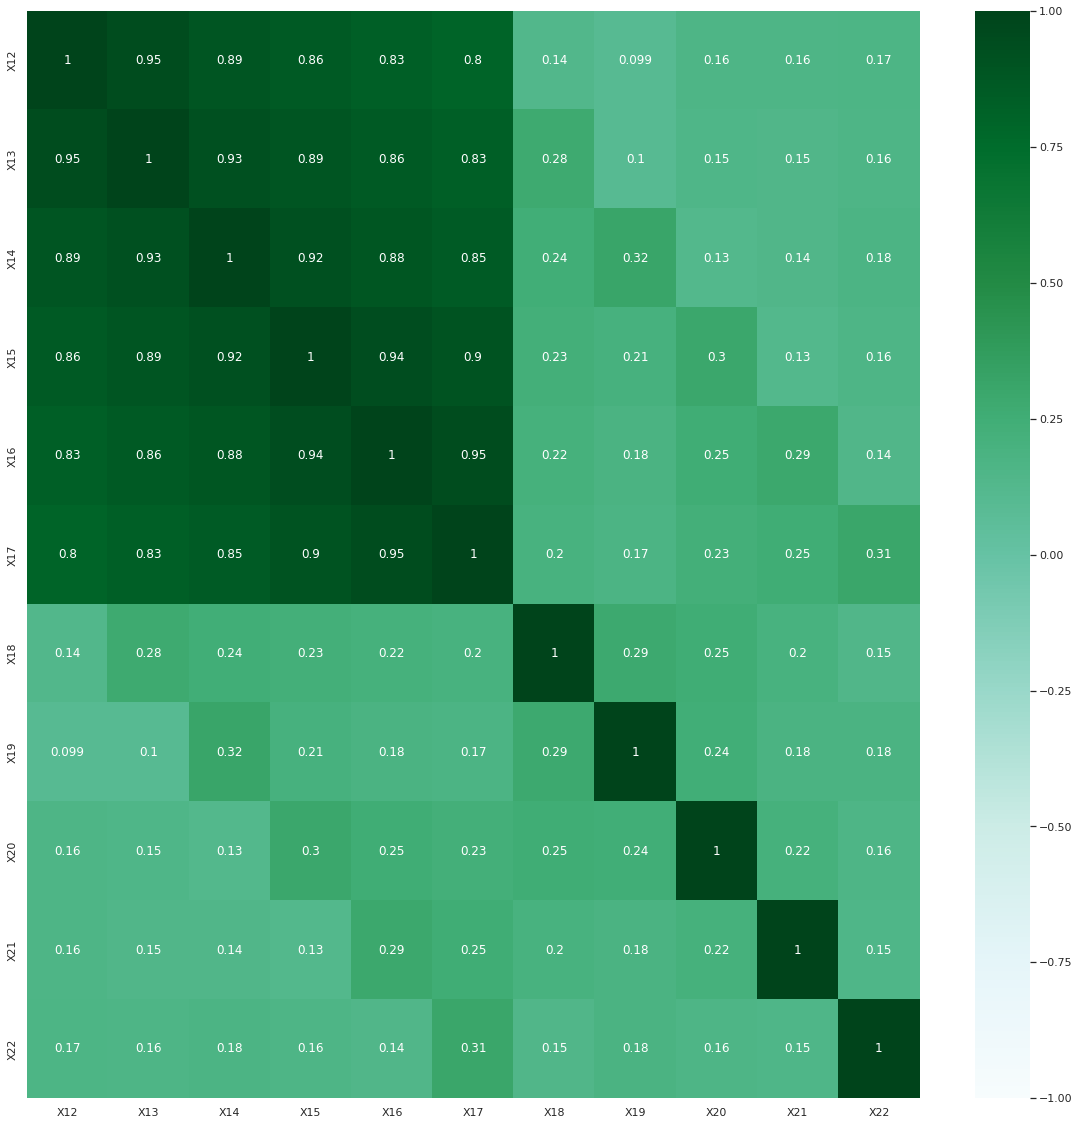

In [25]:

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df_analisis.corr(),vmin = -1, vmax = 1, cmap = "BuGn", annot= True) ## Revisemos la correlaciones entre las variables


In [26]:
## Vemos que hay múltiples variables que están muy correlacionadas positivamente que nos da un inicio de variables que pueden generar duplicidad de la información 

## para obtener un data mas normalizada aplicamos las funcionalidades de la librería PCA y Scale de skarlearn

pcs = PCA() 
pcs.fit(preprocessing.scale(df_analisis.dropna(axis=0))) 


PCA()

In [27]:

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,2.3931,1.2436,0.9516,0.9357,0.8828,0.8550,0.5217,0.2684,0.2050,0.1600,0.1527
Proportion of variance,0.5206,0.1406,0.0823,0.0796,0.0708,0.0665,0.0247,0.0065,0.0038,0.0023,0.0021
Cumulative proportion,0.5206,0.6612,0.7436,0.8231,0.8940,0.9604,0.9852,0.9917,0.9956,0.9979,1.0000


In [18]:
## dado la cumulative proporción y bajo el criterio del 90% de la varianza, observamos que son 6 los componentes que explican el 96% de la información

#Paso 2: Interprete cada componente principal en términos de las variables originales

In [43]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_analisis.columns
                                )


pcsComponents_df.iloc[:,:6]  # a partir de los datos nos permite ver cuales variables correspondes
# a los componentes seleccionados, para ellos entre un mayor valor absoluto, la variable representa más al componente


,PC1,PC2,PC3,PC4,PC5,PC6
X12,0.381411,-0.187452,-0.029312,-0.014229,0.003423,-0.007723
X13,0.393041,-0.158230,0.046228,0.021607,-0.043173,-0.145401
X14,0.397849,-0.096209,0.074855,0.143750,-0.120727,0.098453
X15,0.401086,-0.086926,0.079608,0.026589,0.128973,0.035849
X16,0.398009,-0.067173,0.018121,-0.143485,0.001580,0.057380
X17,0.390687,-0.045384,-0.151008,-0.034588,0.029194,0.020657
X18,0.131332,0.448624,0.384414,0.159872,-0.238382,-0.727996
X19,0.112983,0.490047,0.260491,0.417676,-0.251268,0.629257
X20,0.123786,0.459785,0.146083,-0.225305,0.812258,0.048024
X21,0.112490,0.397638,-0.227468,-0.741898,-0.426733,0.102552


###A continuación se muestra de manera resumen los tres principales y la menor variable que representan a cada componente:



In [48]:
print( " Max Variables  PC1 :" ) 
print( pcsComponents_df.PC1.nlargest(3))

print( " Min Variable  PC1 :" ) 
print( pcsComponents_df.PC1.idxmin())

 Max Variables  PC1 :
X15    0.401086
X16    0.398009
X14    0.397849
Name: PC1, dtype: float64
 Min Variable  PC1 :
X22


In [49]:
print( " Max Variables  PC2 :" ) 
print( pcsComponents_df.PC2.nlargest(3))

print( " Min Variable  PC2 :" ) 
print( pcsComponents_df.PC2.idxmin())

 Max Variables  PC2 :
X19    0.490047
X20    0.459785
X18    0.448624
Name: PC2, dtype: float64
 Min Variable  PC2 :
X12


In [50]:
print( " Max Variables  PC3:" ) 
print( pcsComponents_df.PC3.nlargest(3))

print( " Min Variable  PC3 :" ) 
print( pcsComponents_df.PC3.idxmin())

 Max Variables  PC3:
X18    0.384414
X19    0.260491
X20    0.146083
Name: PC3, dtype: float64
 Min Variable  PC3 :
X22


In [51]:
print( " Max Variables  PC4 :" ) 
print( pcsComponents_df.PC4.nlargest(3))

print( " Min Variable  PC4 :" ) 
print( pcsComponents_df.PC4.idxmin())

 Max Variables  PC4 :
X19    0.417676
X22    0.393685
X18    0.159872
Name: PC4, dtype: float64
 Min Variable  PC4 :
X21


In [52]:
print( " Max Variables  PC5 :" ) 
print( pcsComponents_df.PC5.nlargest(3))

print( " Min Variable  PC5 :" ) 
print( pcsComponents_df.PC5.idxmin())

 Max Variables  PC5 :
X20    0.812258
X15    0.128973
X22    0.065069
Name: PC5, dtype: float64
 Min Variable  PC5 :
X21


In [53]:
print( " Max Variables  PC6 :" ) 
print( pcsComponents_df.PC6.nlargest(3))

print( " Min Variable  PC6 :" ) 
print( pcsComponents_df.PC6.idxmin())

 Max Variables  PC6 :
X19    0.629257
X21    0.102552
X14    0.098453
Name: PC6, dtype: float64
 Min Variable  PC6 :
X18


#Paso 3: Identifique valores atípicos

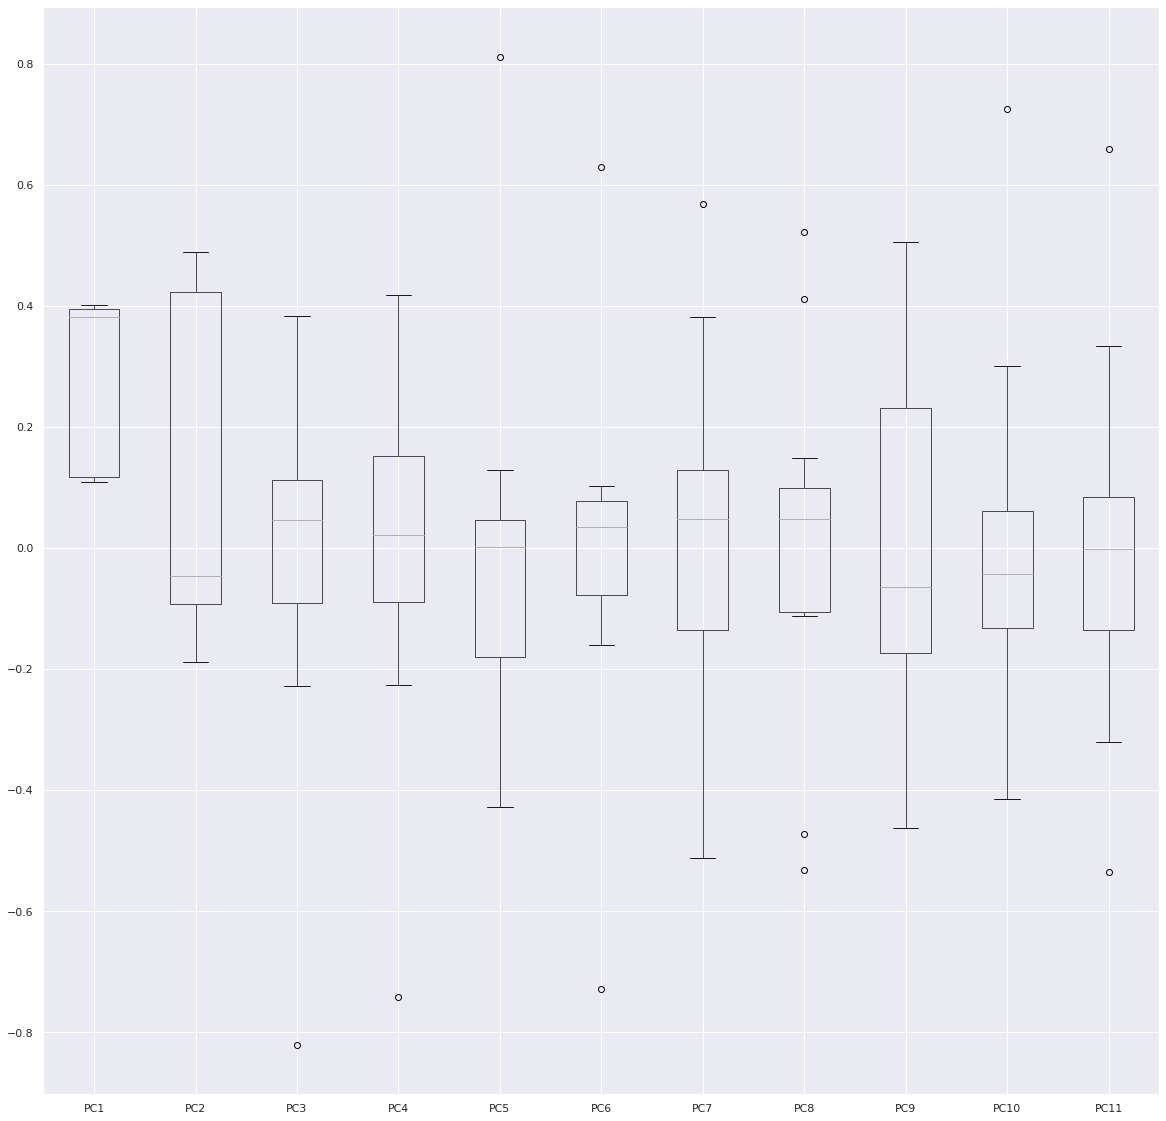

In [44]:
pcsComponents_df.boxplot() ## con ayuda de la librería matplotlib, podemos realizar graficas
# de bigotes que nos permite ver los valores atípicos, siendo estos los puntos más alejados en la barra




#Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

##¿Cuál es el número de componentes mínimo y por qué?

Bajo la teoría de la varianza, que busca explicar la mayor parte de la información, los componentes mínimos son aquellos que logran tener una varianza acumulada del 90%, en el caso del ejercicio, 6 componentes nos representaron más del 90% (  96,04%) de varianza.

##¿Cuál es la variación de los datos que representan esos componentes?

El primer componente nos representa el 52,06% la cual abarca gran parte de la información de los datos.

El segundo componente nos representa el 14.06% de los datos, Representando estos dos el 66.12%, no siendo suficiente para explicar los datos.

Desde el tercer componente hasta el 6, nos forman el 96,04% agregando respectivamente variaciones de 8.2%, 7.9%, 7.08%, 6.6%

##¿Cuál es la pérdida de información después de realizar PCA?

para nuestros cálculos estaría perdiendo el 3,96% de la información

##De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

###Componente PC1 :

Variable mas importante: 
X15 

Variable Menos Importante:
X22


###Componente   PC2 :
Variable más importante: 
X19

Variable Menos Importante:
X12


 ###Componente  PC3:
 Variable más importante: 
X18 

Variable Menos Importante:
X22



###Componente  PC4 :
Variable más importante: 
X19 

Variable Menos Importante:
X21

###Componente  PC5 :
Variable más importante: 
X20 

Variable Menos Importante:
X21

###Componente  PC6 :
Variable más importante: 
X19 

Variable Menos Importante:
X18


##¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

En un modelo se busca que sea un modelo ágil, rápido, no tan complejo para evitar sobre entrenamientos y que puedan explicar la mayor parte de la información, Muchas veces pecamos por el hecho de ingresar todas las variables posibles, con el pensamiento de que todo me va a explicar mi modelo. 
Para esto es muy importante el PCA, ya que nos permite identificar cuáles son las variables realmente importantes y que me explica el comportamiento real de mi modelo, evitando sobrecargas de información que puede hacer nuestros procesos mas complejos y lentos.
